# Electricity Price Prediction
## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## 2. Load and Explore Data

In [2]:
# Load the datasets
train_data = pd.read_csv("2018_CI_Assignment_Training_Data.csv")
test_data = pd.read_csv("2018_CI_Assignment_Testing_Data.csv")

# Display first few rows
print("Training Data Head:")
display(train_data.head())

# Basic statistics
print("\nTraining Data Description:")
display(train_data.describe())

Training Data Head:


,T(t-2),T(t-1),T(t),D(t-2),D(t-1),D(t),P(t+1)
0,23.4,24.3,23.9,4630.1,4522.8,4413.1,15.17
1,24.3,23.9,23.3,4522.8,4413.1,4262.3,14.56
2,23.9,23.3,23.0,4413.1,4262.3,4164.1,14.73
3,23.3,23.0,22.5,4262.3,4164.1,4094.8,15.14
4,23.0,22.5,22.8,4164.1,4094.8,4085.7,14.59



Training Data Description:


,T(t-2),T(t-1),T(t),D(t-2),D(t-1),D(t),P(t+1)
count,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000
mean,26.603033,26.602615,26.601151,5394.542678,5394.842573,5395.182741,30.490994
std,2.564073,2.564629,2.566345,784.876009,784.638352,784.330328,29.919332
min,20.900000,20.900000,20.900000,3807.600000,3807.600000,3807.600000,10.250000
25%,24.600000,24.600000,24.600000,4662.125000,4664.475000,4668.200000,18.985000
50%,26.200000,26.200000,26.200000,5396.600000,5396.600000,5396.600000,24.795000
75%,28.800000,28.800000,28.800000,6113.900000,6113.900000,6113.900000,32.125000
max,32.300000,32.300000,32.300000,6870.000000,6870.000000,6870.000000,460.290000


## 3. Data Visualization - Price Distribution

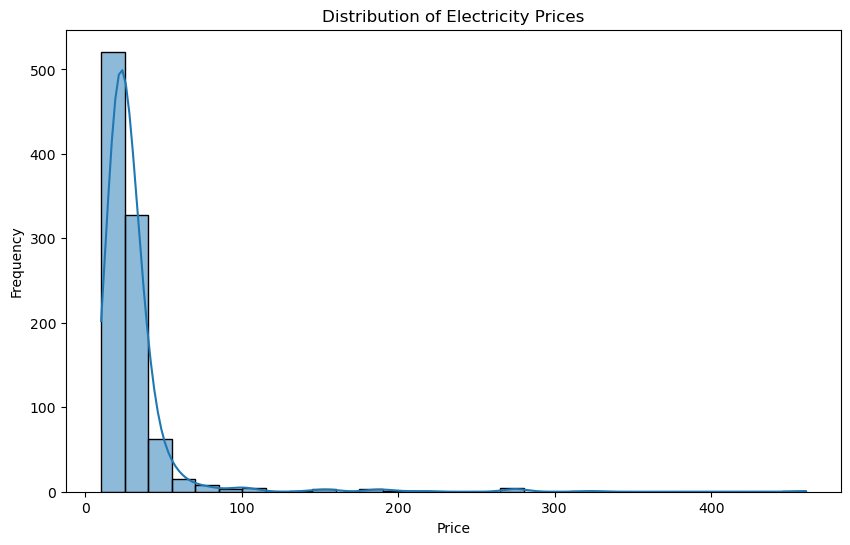

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data.iloc[:, 6], bins=30, kde=True)
plt.title('Distribution of Electricity Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## 4. Data Visualization - Correlation Heatmap

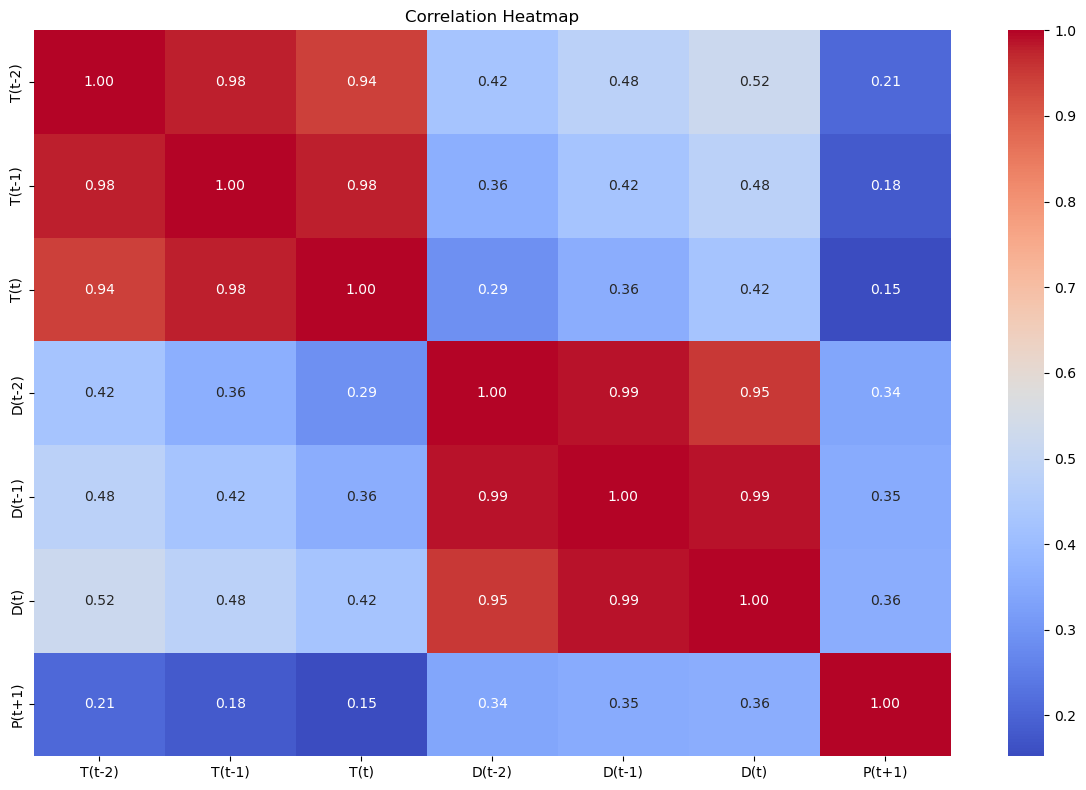

In [4]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

## 5. Data Preprocessing - Outlier Removal

In [5]:
def remove_outliers(data, col_idx=6):
    """Remove outliers using IQR method"""
    q1 = np.percentile(data.iloc[:, col_idx], 25)
    q3 = np.percentile(data.iloc[:, col_idx], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data.iloc[:, col_idx] >= lower_bound) & (data.iloc[:, col_idx] <= upper_bound)]

# Remove outliers
train_data_clean = remove_outliers(train_data)
print("Original training data size:", len(train_data))
print("Training data size after removing outliers:", len(train_data_clean))

Original training data size: 956
Training data size after removing outliers: 901


## 6. Prepare Features and Target

In [6]:
# Prepare features and target
X_train = train_data_clean.iloc[:, :-1]  # All columns except the last one
X_test = test_data.iloc[:, :-1]
y_train = train_data_clean.iloc[:, -1]   # Last column is the target
y_test = test_data.iloc[:, -1]

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeature scaling complete")
print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)


Feature scaling complete
Training set shape: (901, 6)
Test set shape: (506, 6)


## 7. Train Linear Regression Model

In [7]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
print("Model training complete")

Model training complete


## 8. Model Evaluation

In [8]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nModel Performance:")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")


Model Performance:
Train RMSE: 6.20
Test RMSE: 20.15
Train R² Score: 0.3951
Test R² Score: 0.1242


## 9. Visualize Predictions vs Actual

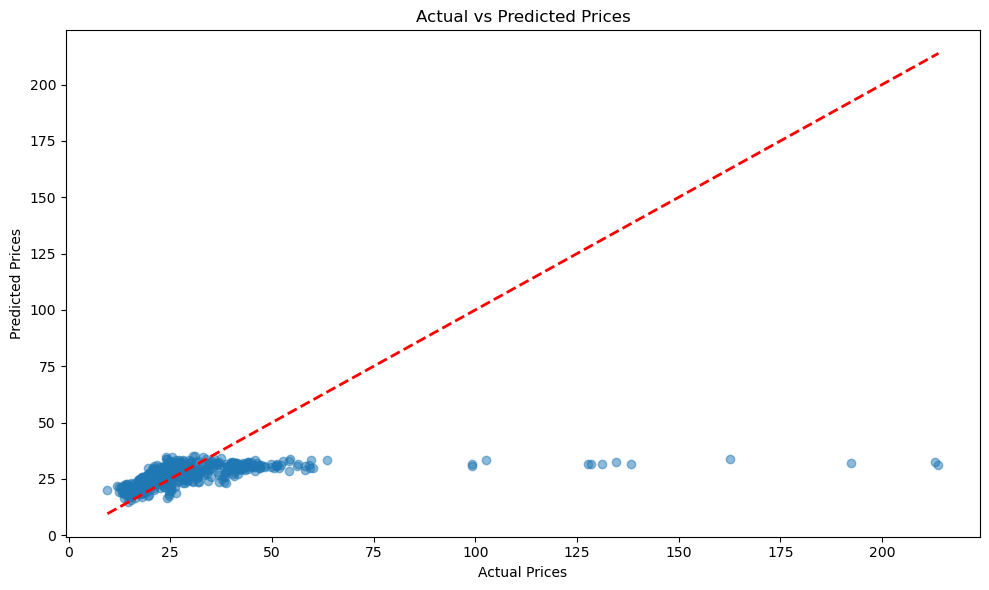

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.tight_layout()
plt.show()

## 10. Feature Importance

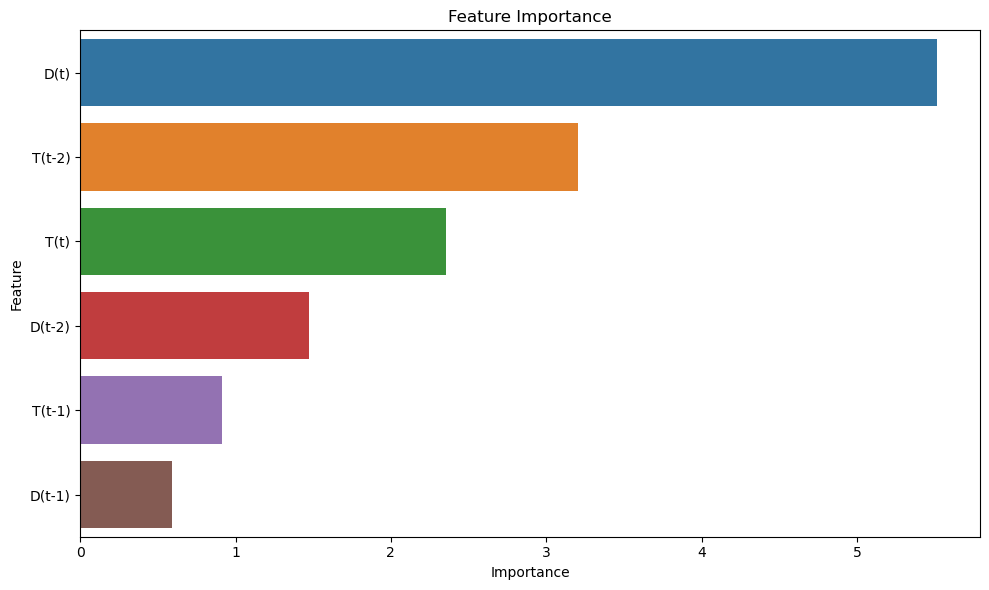


Feature Importance:


,Feature,Importance
5,D(t),5.516465
0,T(t-2),3.202637
2,T(t),2.352979
3,D(t-2),1.471512
1,T(t-1),0.914515
4,D(t-1),0.589763


In [10]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(model.coef_)
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# Display feature importance as a table
print("\nFeature Importance:")
display(feature_importance)